<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Netology_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.
Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [43]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns

## Этапы работы:
### Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [44]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 1 Проведите первичный анализ.

In [45]:
data.shape

(48842, 15)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [56]:
data['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [58]:
data['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

In [57]:
data['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

#### **Вывод: Пропусков нет, все данные в целостности**

In [25]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
data['age'].min()

17

In [50]:
data['capital-gain'].max()

99999

### 2 Проверьте данные на пропуски.
Удалите в случае обнаружения.

*Предложите альтернативный способ работы с пропусками

- count - количество непропущенных объектов
- unique - количество уникальных значений
- top - самое частотное значение (мода)
- freq - частота появления самого частотного значения

In [51]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [52]:
data.loc[1]

age                                38
workclass                     Private
fnlwgt                          89814
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation            Farming-fishing
relationship                  Husband
race                            White
gender                           Male
capital-gain                        0
capital-loss                        0
hours-per-week                     50
native-country          United-States
income                          <=50K
Name: 1, dtype: object

In [36]:
data.sort_values('capital-gain')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
31835,22,Private,448626,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
31836,39,Private,167482,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
31837,45,Private,189792,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
31838,31,Private,399052,9th,5,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,42,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17897,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
6523,48,Private,205100,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,99999,0,80,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
41914,56,Self-emp-inc,98418,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K


In [ ]:
#data[data[''].isna()].head()

### 3 Постройте 1-2 графика на выбор.
Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [26]:
data1 = data.groupby('gender').count()['age']
data1.name = 'Gender'
data1

gender
Female    16192
Male      32650
Name: Gender, dtype: int64

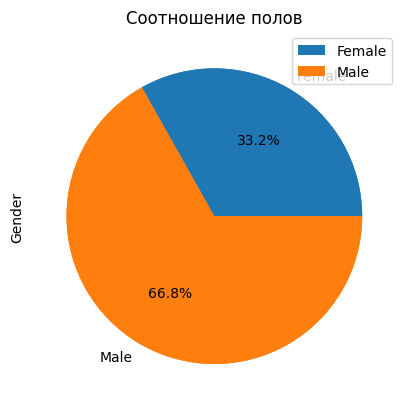

In [60]:
data1.plot.pie(y='Gender');
plt.pie(data1, autopct='%1.1f%%')

plt.title('Соотношение полов')
plt.legend(data1.index);

In [ ]:
data.plot.bar(width=0.8);

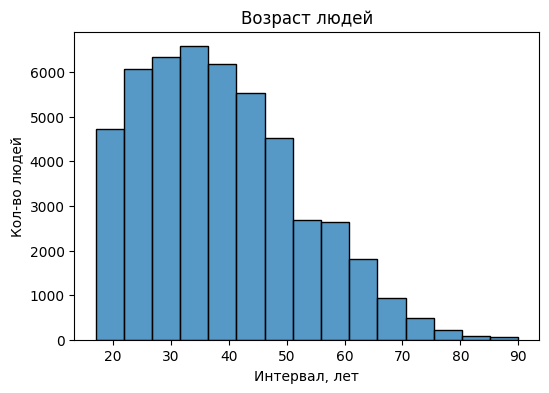

In [40]:
plt.figure(figsize=(6, 4))

sns.histplot(data['age'], bins=15)

plt.title('Возраст людей')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во людей');

In [64]:
data_num_features = data.select_dtypes(include=['float64', 'float32', 'float16'])
# data_num_features.drop('capital-gain', axis=1, inplace=True)

In [ ]:
data_num_features.hist(figsize=(16, 16), bins=20, grid=False);

In [66]:
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

<ipython-input-66-938a16d819fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.0,0.0,0.0,0.0,0.0,0.0
fnlwgt,0.0,1.0,0.0,0.0,0.0,0.0
educational-num,0.0,0.0,1.0,0.0,0.0,0.0
capital-gain,0.0,0.0,0.0,1.0,0.0,0.0
capital-loss,0.0,0.0,0.0,0.0,1.0,0.0
hours-per-week,0.0,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Correlation matrix')

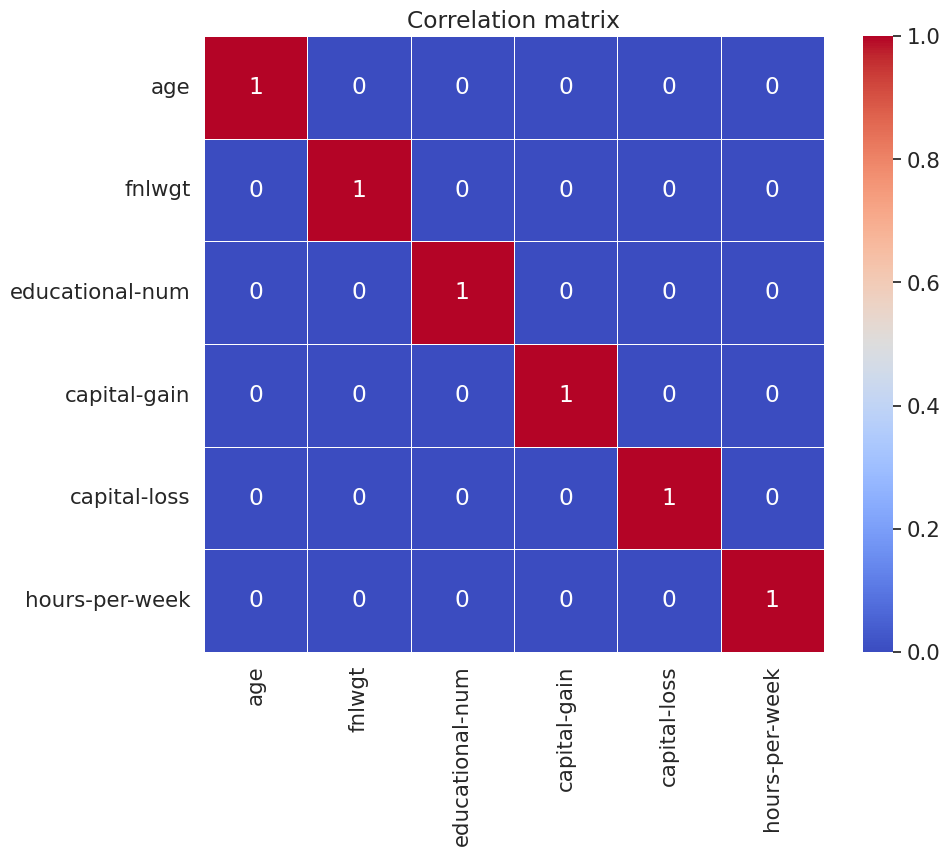

In [67]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

### 4 Преобразуйте категориальные признаки.

In [59]:
from sklearn.linear_model import LogisticRegression

In [68]:
selectedColumns = data[['age', 'capital-gain', 'educational-num', 'income']]

In [69]:
selectedColumns.head()

,age,capital-gain,educational-num,income
0,25,0,7,<=50K
1,38,0,9,<=50K
2,28,0,12,>50K
3,44,7688,10,>50K
4,18,0,10,<=50K


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
le.fit(data['income'])

LabelEncoder()

In [72]:
le.transform(['<=50K', '>50K'])

array([0, 1])

In [73]:
y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

### 5 Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [74]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [77]:
X = pd.get_dummies(selectedColumns, columns=['income'], drop_first=True)

X.head()

,age,capital-gain,educational-num,income_>50K
0,25,0,7,0
1,38,0,9,0
2,28,0,12,1
3,44,7688,10,1
4,18,0,10,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([ 7762, 23881, 30507, 28911, 19484, 43031, 28188, 12761, 40834,
            27875,
            ...
            42704,  9137, 29925, 19791,  4178, 43046, 18798, 29519,   550,
            14337],
           dtype='int64', length=9769)

### 6 Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

#### 6.1 Логистическая регрессия

In [79]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [80]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0])

In [81]:
model.predict(X_test) # получаем массив

array([0, 0, 1, ..., 1, 0, 1])

In [82]:
model.predict_proba(X_test)

array([[9.99874617e-01, 1.25382662e-04],
       [9.99932620e-01, 6.73798788e-05],
       [1.39039083e-04, 9.99860961e-01],
       ...,
       [3.94687960e-04, 9.99605312e-01],
       [9.99956209e-01, 4.37905447e-05],
       [2.29824981e-04, 9.99770175e-01]])

### Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [83]:
model.score(X_train, y_train)

1.0

In [84]:
model.score(X_test, y_test)

1.0

#### 6.2 Метод опорных векторов

In [85]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [86]:
clf.score(X_train, y_train)

1.0

In [87]:
clf.score(X_test, y_test)

1.0

In [88]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(kernel='poly')

### Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [89]:
svc.score(X_train, y_train)

0.7843523660839966

In [90]:
svc.score(X_test, y_test)

0.7906643464018835

### Сформулируйте выводы по проделанной работе.

### Сравните точность двух моделей.

#### **Выводы:**
- Модель логистической регрессии показала точные результаты в 100%, в отличие от метода опорных векторов.
- Модель опорных векторов на тестовой выборке показала точнее результаты (79,1 %), чем на тестовых (78,4 %).
- Было сделано преобразование по доходу: 0 соответствует <=50K и 1 соответствует >50K.
- Можно было бы попровобовать обучить модель с учетом гендерных признаков, в браке/нет, черный/белый.

### Кратко опишите какие преобразования были сделаны с данными.

### Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

*Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.


## Результат:
получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

## Форма выполнения:
ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
## Инструменты:
Jupyter Notebook/Google Colab; GitHub.
## Срок выполнения: 7 календарных дней

*Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально).
Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.